In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Public\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r"C:\Users\sovan dash\Desktop\Project Session track\Project Session track- May 2023\E-Commerce Domain\E-com_Data.csv")

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
#check for missing values
df.isna().sum()/df.shape[0]*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [5]:
df.shape

(541116, 12)

In [6]:
#lets drop the rows of CustomerID
#drop the columns with more than 30percent missing values

df.drop(['Cancelled_status','Reason of return','Sold as set','Shipping Location','Item Code'],inplace=True,axis=1)
df.dropna(inplace=True)

In [7]:
df.isna().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Quantity            0
Time                0
price per Unit      0
Price               0
dtype: int64

In [8]:
df.shape

(404189, 7)

In [9]:
df.duplicated().sum()

673

In [10]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price
0,4355.0,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0
1,4352.0,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0
2,4352.0,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0
3,4352.0,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0
4,4352.0,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403516 entries, 0 to 403515
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        403516 non-null  float64
 1   InvoieNo          403516 non-null  float64
 2   Date of purchase  403516 non-null  object 
 3   Quantity          403516 non-null  float64
 4   Time              403516 non-null  object 
 5   price per Unit    403516 non-null  float64
 6   Price             403516 non-null  float64
dtypes: float64(5), object(2)
memory usage: 21.6+ MB


In [13]:
#change the time to the paticular hour
df['Time']=pd.to_datetime(df['Time']).dt.hour

In [14]:
#change time format to date time format

df['Date of purchase']=pd.to_datetime(df['Date of purchase'])

In [15]:
df=df.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date','Time':'Time(hr)'})

In [16]:
df['Quantity']=df['Quantity'].astype(int)

In [17]:
df.head()

,CustomerID,InvoiceNo,Date,Quantity,Time(hr),price per Unit,Price
0,4355.0,398177.0,2017-10-29,6,15,321.0,1926.0
1,4352.0,394422.0,2017-05-10,2,14,870.0,1740.0
2,4352.0,394422.0,2017-12-10,2,14,933.0,1866.0
3,4352.0,388633.0,2017-08-22,3,14,623.0,1869.0
4,4352.0,394422.0,2017-10-10,2,14,944.0,1888.0


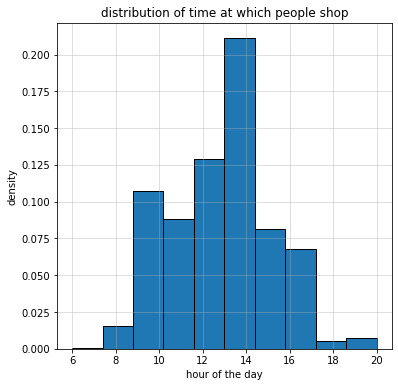

In [18]:
plt.figure(figsize=(6,6))
plt.hist(df['Time(hr)'],density=True,edgecolor='black')
plt.title('distribution of time at which people shop')
plt.xlabel('hour of the day')
plt.ylabel('density')

plt.grid(True,alpha=0.5)
plt.show()

In [19]:
dataset=df[['CustomerID','InvoiceNo','Date','Price']]

In [20]:
import datetime as dt
latest_date=dt.datetime(2017,12,20)

In [21]:
RFM=dataset.groupby('CustomerID').agg({
    'Date':lambda x:(latest_date-x.max()).days,
    'InvoiceNo':lambda x:x.count(),
    'Price': lambda x:x.sum()
})

RFM.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace=True)

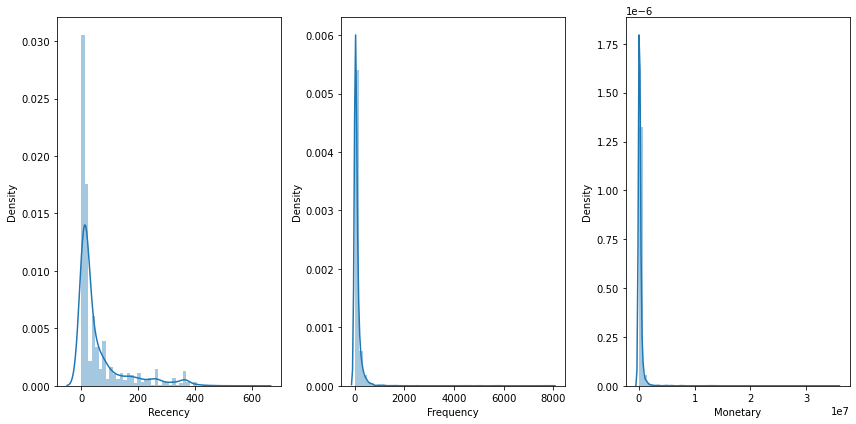

In [22]:
plt.figure(figsize=(12,6))


plt.subplot(1,3,1)
sns.distplot(RFM['Recency'])

plt.subplot(1,3,2)
sns.distplot(RFM['Frequency'])

plt.subplot(1,3,3)
sns.distplot(RFM['Monetary'])

plt.tight_layout()
plt.show()

In [23]:
#the data here is highly skewed, we will apply log transformation and check the results

In [24]:
RFM=RFM.reset_index(drop=True)

In [25]:
quantile=RFM.quantile([0.25,0.5,0.75]).to_dict()

In [26]:
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38147.0, 0.5: 83635.0, 0.75: 205535.0}}

In [27]:
quantile['Recency'][0.25]

10.0

In [28]:
def recency_rating(x,q,a):
    if x<=q[a][0.25]:
        return 1
    elif x<=q[a][0.5]:
        return 2
    elif x<=q[a][0.75]:
        return 3
    else:
        return 4
    
def frequency_rating(x,q,a):
    if x>=q[a][0.75]:
        return 1
    elif x>=q[a][0.5]:
        return 2
    elif x>=q[a][0.25]:
        return 3
    else:
        return 4
    
def monetary_rating(x,q,a):
    if x>=q[a][0.75]:
        return 1
    elif x>=q[a][0.5]:
        return 2
    elif x>=q[a][0.25]:
        return 3
    else:
        return 4

In [29]:
RFM['R']=RFM['Recency'].apply(recency_rating,args=(quantile,'Recency'))
RFM['F']=RFM['Frequency'].apply(frequency_rating,args=(quantile,'Frequency'))
RFM['M']=RFM['Monetary'].apply(monetary_rating,args=(quantile,'Monetary'))

In [30]:
RFM['score']=RFM['R']+RFM['F']+RFM['M']

In [31]:
RFM

,Recency,Frequency,Monetary,R,F,M,score
0,4,182,553704.0,1,1,1,3
1,77,27,257404.0,4,3,1,8
2,20,72,176613.0,3,2,2,7
3,18,16,41976.0,2,4,3,9
4,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...
4344,17,10,20480.0,2,4,4,10
4345,181,7,10774.0,4,4,4,12
4346,12,13,24962.0,2,4,4,10
4347,4,752,280188.0,1,1,1,3


In [32]:
def cluster(score):
    if score<=5:
        return 1
    elif score<=8:
        return 2
    elif score<=10:
        return 3
    else:
        return 4

In [33]:
RFM['cluster']=RFM['score'].map(cluster)

In [34]:
RFM

,Recency,Frequency,Monetary,R,F,M,score,cluster
0,4,182,553704.0,1,1,1,3,1
1,77,27,257404.0,4,3,1,8,2
2,20,72,176613.0,3,2,2,7,2
3,18,16,41976.0,2,4,3,9,3
4,9,84,151822.0,1,2,2,5,1
...,...,...,...,...,...,...,...,...
4344,17,10,20480.0,2,4,4,10,3
4345,181,7,10774.0,4,4,4,12,4
4346,12,13,24962.0,2,4,4,10,3
4347,4,752,280188.0,1,1,1,3,1


In [35]:
RFM['cluster'].value_counts()

1    1318
2    1297
3     939
4     795
Name: cluster, dtype: int64

# USING KMEANS CLUSTERING

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [37]:
RFM1=RFM.iloc[:,:3]

In [38]:
RFM1

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,752,280188.0


(0.0, 10000000.0)

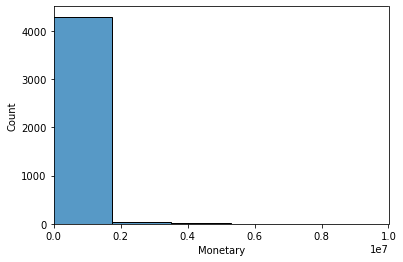

In [39]:
sns.histplot(RFM1['Monetary'],bins=20)
plt.xlim((0,10000000))

In [40]:
#scale the data as RFM have different scales
sc=StandardScaler()
sc_log=StandardScaler()

In [41]:
scaled_data=pd.DataFrame(sc.fit_transform(RFM1),columns=RFM1.columns)

In [42]:
scaled_data

,Recency,Frequency,Monetary
0,-0.640796,0.385637,0.378333
1,0.173513,-0.284349,0.032341
2,-0.462317,-0.089837,-0.061999
3,-0.484627,-0.331897,-0.219216
4,-0.585021,-0.037967,-0.090948
...,...,...,...
4344,-0.495782,-0.357832,-0.244317
4345,1.333623,-0.370799,-0.255651
4346,-0.551556,-0.344864,-0.239083
4347,-0.640796,2.849458,0.058946


In [43]:
#check the optimal number of clusters by elbow method
#evaluate the model using silhoutte score,which suggest how well seperated the clusters are.+1 indicating that the ponit is 
#properly matched to its own cluster.
within_cluster_sum_squares=[]
silhouette_scores=[]

for i in range(2,15):
    kmeans=KMeans(n_clusters=i,max_iter=1000,random_state=42)
    kmeans.fit(scaled_data)
    within_cluster_sum_squares.append(kmeans.inertia_)
    sil_score=silhouette_score(scaled_data,kmeans.labels_)
    silhouette_scores.append(sil_score)
    

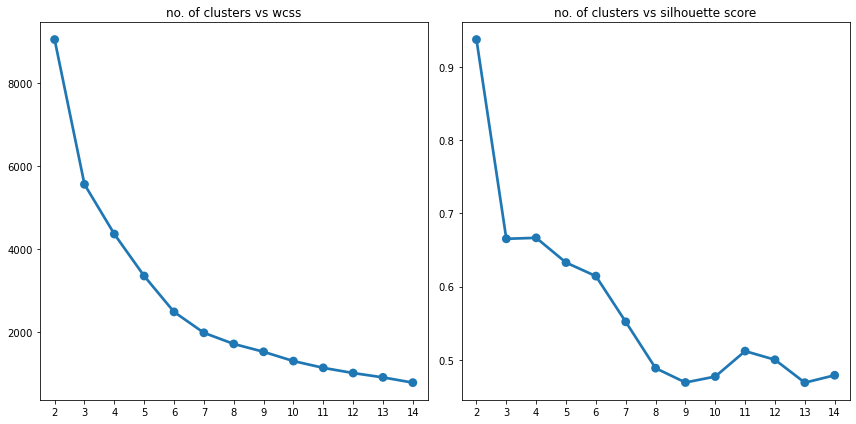

In [44]:
#choose the number of cluster where the wcss becomes constant,here its from 5
#silhouette score decreases after 4,5.

plt.figure(figsize=(12,6))

label_range=[2,3,4,5,6,7,8,9,10,11,12,13,14]

plt.subplot(1,2,1)
sns.pointplot(label_range,within_cluster_sum_squares)
plt.title('no. of clusters vs wcss')

plt.subplot(1,2,2)
sns.pointplot(label_range,silhouette_scores)
plt.title('no. of clusters vs silhouette score')

plt.tight_layout()
plt.show()

In [45]:
#looking at the above 2 scores and graph we can choose 4 or 5 clusters to fit our model as the silhouette sccores falls sharply
#from there

In [46]:
kmeans=KMeans(n_clusters=4,max_iter=1000,random_state=42)
RFM1['cluster']=kmeans.fit_predict(scaled_data)

In [47]:
RFM1['cluster'].value_counts()

0    3698
1     636
3      11
2       4
Name: cluster, dtype: int64

In [48]:
#how do we decide ehich cluster belongs to what type of group,for that we can do a cluster profiling with their means.

In [49]:
print('cluster profile for kmeans approach')
cluster_profile = RFM1.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_profile)
print('**********************')
print('cluster profile for quantile based approach')
cluster_profile = RFM.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_profile)


cluster profile for kmeans approach
            Recency    Frequency      Monetary
cluster                                       
0         28.800162    95.535425  2.169751e+05
1        252.600629    22.191824  4.648383e+04
2          2.500000  5866.750000  8.351909e+06
3          5.272727  1149.545455  1.215036e+07
**********************
cluster profile for quantile based approach
            Recency   Frequency       Monetary
cluster                                       
1         10.246586  226.440061  582900.157056
2         33.063223   56.887433  123467.793369
3         84.732694   24.965921   55223.142812
4        165.123270    9.864151   23578.047799


#as we can see here the the groups are divided as follows from best to wrose>
 cluster 2 >cluster 3 >cluster 0 >cluster 1

# Applying log transformation on RFM

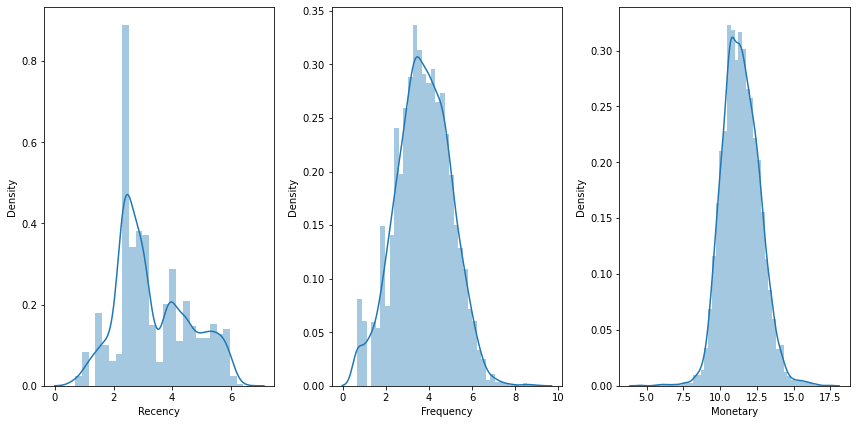

In [50]:
plt.figure(figsize=(12,6))


log_recency=np.log1p(RFM['Recency'])
log_frequency=np.log1p(RFM['Frequency'])
log_monetary=np.log1p(RFM['Monetary'])

plt.subplot(1,3,1)
sns.distplot(log_recency)

plt.subplot(1,3,2)
sns.distplot(log_frequency)

plt.subplot(1,3,3)
sns.distplot(log_monetary)

plt.tight_layout()
plt.show()

In [51]:
log_transform_RFM=pd.DataFrame({'Recency':log_recency,'Frequency':log_frequency,'Monetary':log_monetary.fillna(log_monetary.mean())})

In [52]:
log_scaled_RFM=pd.DataFrame(sc_log.fit_transform(log_transform_RFM),columns=log_transform_RFM.columns)

In [53]:
kmeans_log=KMeans(n_clusters=4,max_iter=1000,random_state=42)
log_transform_RFM['cluster']=kmeans_log.fit_predict(log_scaled_RFM)

In [54]:
print('values in each cluster for: ')
print('kmeans using log transform RFM: ')
print(log_transform_RFM['cluster'].value_counts())
print('quantile based RFM: ')
print(RFM['cluster'].value_counts())
print('kmeans: ')
print(RFM1['cluster'].value_counts())

values in each cluster for: 
kmeans using log transform RFM: 
3    1353
0    1272
2     906
1     818
Name: cluster, dtype: int64
quantile based RFM: 
1    1318
2    1297
3     939
4     795
Name: cluster, dtype: int64
kmeans: 
0    3698
1     636
3      11
2       4
Name: cluster, dtype: int64


In [55]:
print('cluster profile for kmeans approach')
cluster_profile = RFM1.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_profile)
print('**********************')

print('cluster profile for quantile based approach')
cluster_profile = RFM.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_profile)

print('**********************')

print('cluster profile for log transformed RFM based approach')
cluster_profile = log_transform_RFM.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print(cluster_profile)

cluster profile for kmeans approach
            Recency    Frequency      Monetary
cluster                                       
0         28.800162    95.535425  2.169751e+05
1        252.600629    22.191824  4.648383e+04
2          2.500000  5866.750000  8.351909e+06
3          5.272727  1149.545455  1.215036e+07
**********************
cluster profile for quantile based approach
            Recency   Frequency       Monetary
cluster                                       
1         10.246586  226.440061  582900.157056
2         33.063223   56.887433  123467.793369
3         84.732694   24.965921   55223.142812
4        165.123270    9.864151   23578.047799
**********************
cluster profile for log transformed RFM based approach
          Recency  Frequency   Monetary
cluster                                
0        2.336854   5.143249  12.824496
1        4.698435   2.045844   9.969639
2        4.547153   3.606311  11.260911
3        2.613390   3.550461  11.059287


In [56]:
#here we can see that harcoded quantile based and log transformed RFM using kmeans perform well in comparison to direct kmeans,
#so we can use either of those methods
# the order of cluster for kmeans(log transformed) is (best to worse):
#cluster 0>cluster 3>cluster 2>cluster 1

# assignning cluster to a new data point

In [72]:
def cluster_assignment(R,F,M):
    log_transformed_new_point = pd.DataFrame({
    'Recency': [np.log1p(R)],
    'Frequency': [np.log1p(F)],
    'Monetary': [np.log1p(M)]
    })

    # Scale the new data
    scaled_new_data = sc_log.transform(log_transformed_new_point)
    
    # Use the trained KMeans model to predict the cluster
    predicted_cluster = kmeans_log.predict(scaled_new_data)
    

    return predicted_cluster[0]

cluster_assignment(100,10,1000)

1